In [2]:
# import scqubits.testing as sctest
# sctest.run()

c:\Users\Owner\anaconda3\Lib\site-packages\qutip\solver\solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


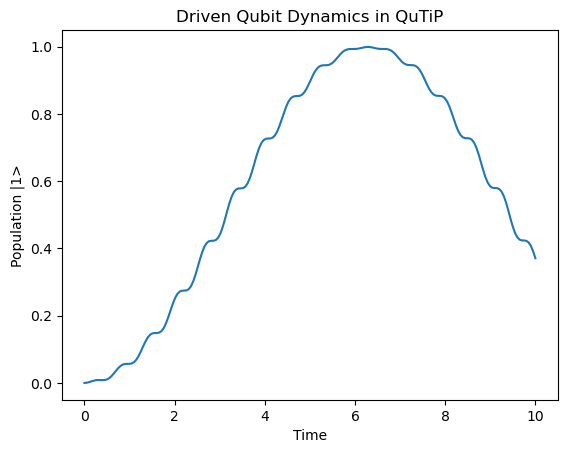

In [3]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

w_q = 5.0      # qubit frequency
A = 0.5        # drive amplitude
w_d = 5.0      # drive frequency
tlist = np.linspace(0, 10, 200)
psi0 = qt.basis(2, 0)  # initial state |0>

def drive_coeff(t, args):
    return A * np.cos(args['w_d'] * t)

# Hamiltonian definition
H = [w_q/2 * qt.sigmaz(), [qt.sigmax(), drive_coeff]]
args = {'w_d': w_d}

# Time evolution
result = qt.mesolve(H, psi0, tlist, [], [], args=args)

# Plot population of |1>
pop1 = [np.abs(state.overlap(qt.basis(2,1)))**2 for state in result.states]
plt.plot(tlist, pop1)
plt.xlabel('Time')
plt.ylabel('Population |1>')
plt.title('Driven Qubit Dynamics in QuTiP')
plt.show()


In [4]:
args

{'w_d': 5.0}

In [5]:
H

[Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
 Qobj data =
 [[ 2.5  0. ]
  [ 0.  -2.5]],
 [Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
  Qobj data =
  [[0. 1.]
   [1. 0.]],
  <function __main__.drive_coeff(t, args)>]]

In [6]:
args

{'w_d': 5.0}

In [7]:
psi0

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]

In [8]:
from qutip import Qobj

psi02 = Qobj([[1], [0]])

psi02

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]

In [9]:
psi03 = qt.sigmax()	

psi03

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [10]:
if (psi02 == psi0):
    print("Equal")

Equal


In [11]:
psi0.dag() * psi03

Quantum object: dims=[[1], [2]], shape=(1, 2), type='bra', dtype=Dense
Qobj data =
[[0. 1.]]

## Generated Tutorial on qubit driving



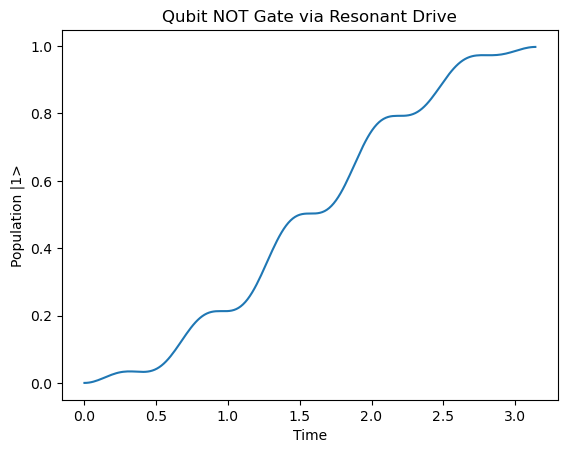

In [12]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

# Parameters
w_q = 5.0      # Qubit frequency (arbitrary units)
A = 1.0        # Drive amplitude (sets Rabi frequency)
w_d = 5.0      # Drive frequency (set equal to qubit frequency for resonance)
t_pi = np.pi / A  # Duration for a pi-pulse (NOT gate)
tlist = np.linspace(0, t_pi, 200)  # Time array covering one pi-pulse

# Initial state: |0>
psi0 = qt.basis(2, 0)

# Time-dependent drive coefficient
def drive_coeff(t, args):
    return args['A'] * np.cos(args['w_d'] * t)

# Hamiltonian: static + time-dependent drive
H = [w_q/2 * qt.sigmaz(), [qt.sigmax(), drive_coeff]]
args = {'w_d': w_d, 'A': A}

# Time evolution
result = qt.mesolve(H, psi0, tlist, [], [], args=args)

# Calculate population of |1>
pop1 = [np.abs(state.overlap(qt.basis(2,1)))**2 for state in result.states]

# Plot results
plt.plot(tlist, pop1)
plt.xlabel('Time')
plt.ylabel('Population |1>')
plt.title('Qubit NOT Gate via Resonant Drive')
plt.show()


In [19]:
from qutip_qip.circuit import QubitCircuit
from qutip import basis

# Create a 1-qubit circuit
qc = QubitCircuit(1)
qc.add_gate("X", targets=0)      # Pauli-X
qc.add_gate("SNOT", targets=0)   # Hadamard
# qc.add_gate("RZ", targets=0, arg_value=0.5)  # RZ rotation

# Simulate the circuit
init_state = basis(2, 0)  # |0>
final_state = qc.run(init_state)
print(final_state)


Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[ 0.70710678]
 [-0.70710678]]


In [21]:
from qutip_qip.circuit import QubitCircuit
from qutip import basis

# Create a 2-qubit circuit
qc = QubitCircuit(2)
qc.add_gate("CNOT", controls=0, targets=1)
qc.add_gate("SWAP", targets=[0, 1])

# Simulate the circuit
init_state = basis([2, 2], [0, 1])  # |01>
final_state = qc.run(init_state)
print(final_state)

print("-----------------------")

qc.draw("text")                 # For text output



Quantum object: dims=[[2, 2], [1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]
-----------------------
        ┌──────┐        
 q1 :───┤ CNOT ├───╳────
        └───┬──┘   │    
            │      │    
 q0 :───────█──────╳────
                        


In [16]:
import numpy as np
from qutip import Qobj
from qutip_qip.circuit import QubitCircuit

def custom_gate():
    # Example: S gate
    mat = np.array([[1., 0], [0., 1j]])
    return Qobj(mat, dims=[[2], [2]])

qc = QubitCircuit(1)
qc.user_gates = {"S": custom_gate}
qc.add_gate("S", targets=0)


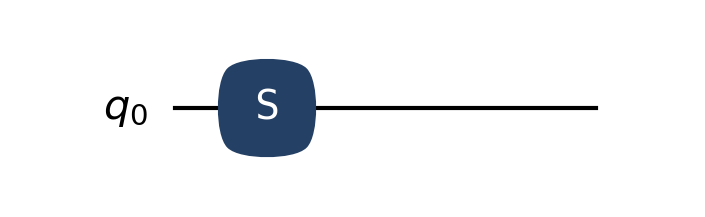

        ┌───┐   
 q0 :───┤ S ├───
        └───┘   


In [17]:
qc.draw("matplotlib", dpi=300)  # For graphical output
qc.draw("text")                 # For text output


In [18]:
from qutip import basis

init_state = basis([2, 2], [0, 0])  # |00>
final_state = qc.run(init_state)
print(final_state)


Quantum object: dims=[[2, 2], [1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]
